# Lecture 5: Supervised Models, [Classification Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* How to train a classification tree with `sklearn`.

## Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Data

We use the well-known [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset) data set with three classes:

    Iris-Setosa            Iris-Versicolour           Iris-Virginica
  
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1280px-Iris_virginica_2.jpg" alt="Advanced" style="width: 200px; display: inline; margin-top: 0"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg" alt="Advanced" style="width: 200px; display: inline; margin-top: 0"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Advanced" style="height: 200px; display: inline; margin-top: 0"/>

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

Instead of the matrices `X` and `y`, we now load the full data set, including its label names:
* the $X$'s are now in `iris.data`
* the $y$'s are now in `iris.target`
* and the labels are in `iris.target_names`
* see the [`load_iris()` doc](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=load_iris) for more (e.g., the feature names)

## Classification Trees

### Steps 1-4
We follow the `sklearn` training process as seen on the slides.

In [3]:
from sklearn import tree

# choose model & hyperparameters
model = tree.DecisionTreeClassifier()

# fit
model.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0 plants have been miscategorised:

In [4]:
model.score(iris.data, iris.target)

1.0

Let's have a look at the confusion matrix (now with label names):
* I got the arguments `xticklabels` and `yticklabels` from the `sns.heatmap()` [doc](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

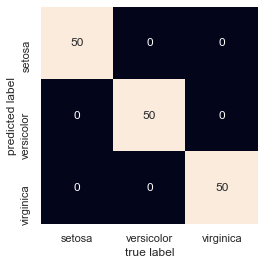

In [5]:
from sklearn.metrics import confusion_matrix

# predict
y_fit = model.predict(iris.data)

cm = confusion_matrix(iris.target, y_fit)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Plotting the Tree
There is a method called [`sklearn.tree.plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html), but at least on my system it isn't working properly:

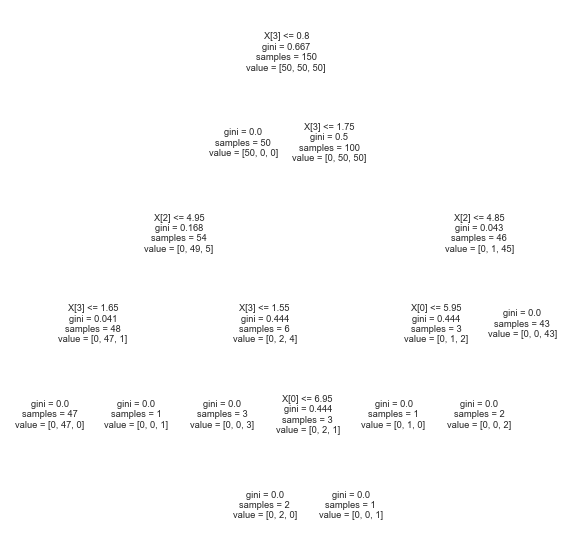

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model, ax=ax);

Instead, we use the graph visualisation library [`Graphviz`](https://www.graphviz.org/). To install Graphviz on your machine, run `conda install python-graphviz`.

To make our decision tree Graphviz compatible, we export it in a special data format using [`tree.export_graphviz()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and then create the graph using [`graphviz.Source()`](https://graphviz.readthedocs.io/en/stable/api.html#graphviz.Source).

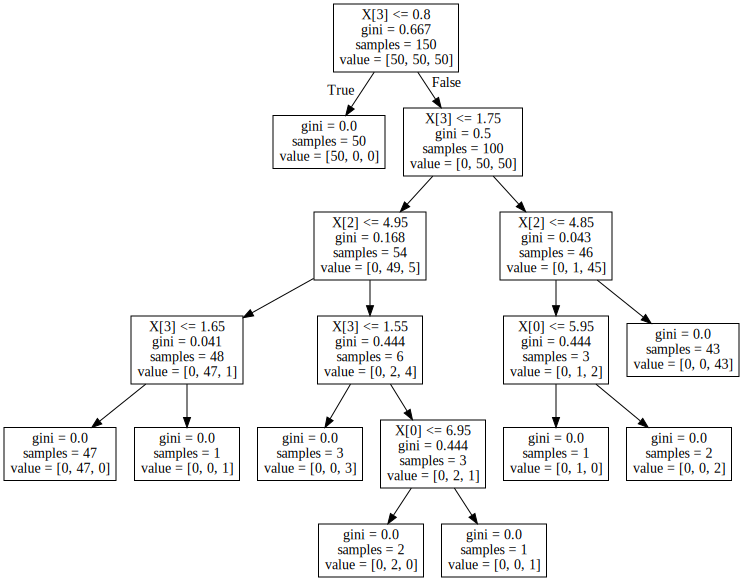

In [7]:
import graphviz

dot_data = tree.export_graphviz(model) 
graph = graphviz.Source(dot_data) 
graph

We can make the whole tree more legible by including the target and feature names:
* `class` now tells us which class is the most common in each node
* each colour corresponds to one class
* `value` is the number of samples in each class

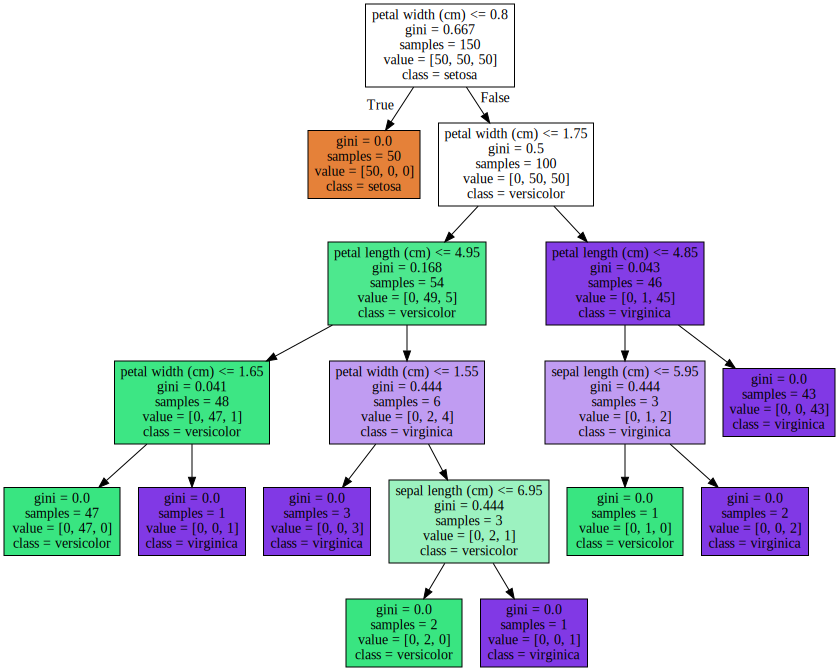

In [8]:
dot_data = tree.export_graphviz(model,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True) 
graph = graphviz.Source(dot_data) 
graph

### Hyperparameters

We can see that the tree fits the training data perfectly: the accuracy is 100% and we have very small leaf nodes with some only holding 1 data point. This is an example of overfitting.

There are three **main hyperparameters** we usually consider when tuning decision trees:
* `max_depth`: the maximum depth of the tree (where the root has depth=0)
* `min_samples_split`: the minimum number of samples in each node for it to be split (if necessary)
* `min_samples_leaf`: the minimum number of samples in each leaf
* `ccp_alpha`: a cost parameter for complex trees with many terminal nodes; similar in effect to lasso regularisation.

The default values for each of these allow very tightly fitting trees, as we have seen above.

#### Depth, Splits, and Leaves

Let's try another tree with:
* `max_depth=3`
* `min_samples_split=5`
* `min_samples_leaf=5`

accuracy: 0.9733333333333334


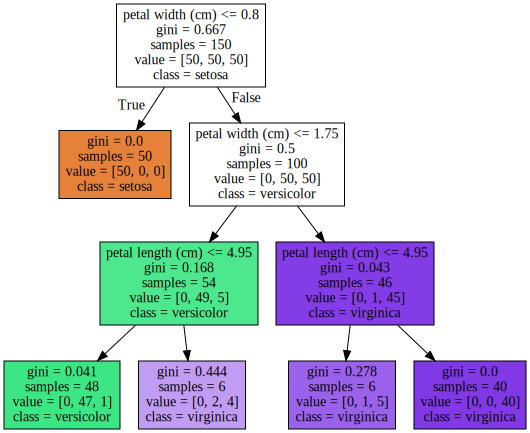

In [9]:
# choose model & hyperparameters
model = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=5)

# fit
model.fit(iris.data, iris.target)

print(f'accuracy: {model.score(iris.data, iris.target)}')

dot_data = tree.export_graphviz(model,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True) 
graph = graphviz.Source(dot_data) 
graph

The model doesn't fit better, but it clearly is less prone to outliers.

The Iris data is fairly small and is easily modelled with a decision tree. For that reason, we will not spend more time on improving the hyperparameters. We will study more complex classification problem later when we get to random forests.

#### Pruning

Alternatively, we can let sklearn **prune** the tree. This is done by finding a subtree that minimises misfit (the default behaviour) *and the number of terminal leaves (pruning)*. This procedure is called *cost-complexity pruning* (*CCP*). `ccp_alpha` ($\alpha$ in many text books) controls the cost of leaves, and by default `ccp_alpha=0`. Let's see what happens if we set `ccp_alpha=0.1`:

accuracy: 0.96


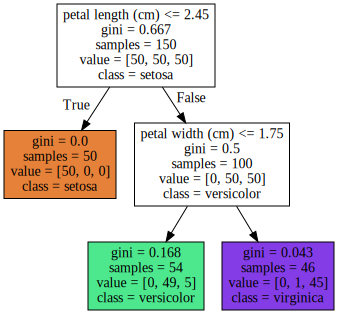

In [12]:
# choose model & hyperparameters
model = tree.DecisionTreeClassifier(ccp_alpha=0.1)

# fit
model.fit(iris.data, iris.target)

print(f'accuracy: {model.score(iris.data, iris.target)}')

dot_data = tree.export_graphviz(model,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True) 
graph = graphviz.Source(dot_data) 
graph

We can see that the returned tree is a subtree of the original, pruned of its unnecessarily granular leaves.

Note that depth, splits, and leaves and pruning are not equivalent, but complementary. Depth, splits, and leaves can produce different trees, while pruning always selects a subtree of the original tree.

© 2023 Philipp Cornelius